Business Case Study: Employee Absenteeism
The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

The business Task
The exercise will address Absenteeism at a company during work time.

Problem: The problem is that the work environment of today is more:

Competitive
Managers set unachievable business goals
have an elevated risk of becoming unemployed This can be lead to an increase in pressure and stress of the employee. Those factors influence employee health, which is of course indesirable.


What is Absenteeism?
Absence from work during normal working hours resulting in temporary incapacity to execute a regular working activity.

Based on what information should we predict whether an employee is expected to be absent or not?


How should we measure absenteeism?
Purpose of the business exercise:¶

Explore whether a person presenting certain characteristics is expected to be away from work at some point in time or not.

We want to know for how many working hours any employee could be away from work based on information like:

How far they live from their workplace.


How many children and pets they have.
Do they have higher education?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
data = pd.read_excel('Absenteeism_at_work_Project.xls')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [8]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.00,737.00,739.00,740.00,740.00,733.00,737.00,737.00,737.00,730.00,...,734.00,730.00,734.00,737.00,736.00,738.00,739.00,726.00,709.00,718.00
mean,18.02,19.19,6.32,3.91,2.54,221.04,29.67,12.57,36.45,271188.86,...,0.05,1.30,1.02,0.57,0.07,0.75,79.06,172.15,26.68,6.98
std,11.02,8.44,3.44,1.42,1.11,66.95,14.85,4.39,6.48,38981.88,...,0.22,0.68,1.09,0.50,0.26,1.32,12.87,6.08,4.29,13.48
min,1.00,0.00,0.00,2.00,1.00,118.00,5.00,1.00,27.00,205917.00,...,0.00,1.00,0.00,0.00,0.00,0.00,56.00,163.00,19.00,0.00
25%,9.00,13.00,3.00,3.00,2.00,179.00,16.00,9.00,31.00,244387.00,...,0.00,1.00,0.00,0.00,0.00,0.00,69.00,169.00,24.00,2.00
50%,18.00,23.00,6.00,4.00,3.00,225.00,26.00,13.00,37.00,264249.00,...,0.00,1.00,1.00,1.00,0.00,0.00,83.00,170.00,25.00,3.00
75%,28.00,26.00,9.00,5.00,4.00,260.00,50.00,16.00,40.00,284853.00,...,0.00,1.00,2.00,1.00,0.00,1.00,89.00,172.00,31.00,8.00
max,36.00,28.00,12.00,6.00,4.00,388.00,52.00,29.00,58.00,378884.00,...,1.00,4.00,4.00,1.00,1.00,8.00,108.00,196.00,38.00,120.00


In [62]:
def understanding_dataset(dataset):
    print(f"Shape: {dataset.shape}")
    print(f"Total Missing Value in Dataset: {dataset.isna().sum().sum()}")
    
    for column in dataset.columns:
        print(f"===============Column: {column} ==============")
        print(f"Number of unique values: {dataset[column].nunique()}")
        print(f"Max: {dataset[column].max()}")
        print(f"Min: {dataset[column].min()}")
        
        if(dataset[column].isna().any()):
            print(f"Missing Value: {round((data[[column]].isna().sum() / len(data) ) * 100 , 2)}")
    
        print("\n")
    
    

In [63]:
understanding_dataset(data)

Shape: (740, 21)
Total Missing Value in Dataset: 135
===============Column: ID ==============
Number of unique values: 36
Max: 36
Min: 1


===============Column: Reason for absence ==============
Number of unique values: 28
Max: 28.0
Min: 0.0
Missing Value: Reason for absence    0.41
dtype: float64


===============Column: Month of absence ==============
Number of unique values: 13
Max: 12.0
Min: 0.0
Missing Value: Month of absence    0.14
dtype: float64


===============Column: Day of the week ==============
Number of unique values: 5
Max: 6
Min: 2


===============Column: Seasons ==============
Number of unique values: 4
Max: 4
Min: 1


===============Column: Transportation expense ==============
Number of unique values: 24
Max: 388.0
Min: 118.0
Missing Value: Transportation expense    0.95
dtype: float64


===============Column: Distance from Residence to Work ==============
Number of unique values: 25
Max: 52.0
Min: 5.0
Missing Value: Distance from Residence to Work    0.41
dtype: 

In [70]:
#     for column in data.columns:
#         print(f"===============Column: {column}==============")
#         print(f"Number of unique values: {data[column].nunique()}")
#         print(f"Max: {data[column].max()}")
#         print(f"Min: {data[column].min()}")

In [84]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [85]:
data.ID.value_counts()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
6       8
9       8
23      8
27      7
30      7
12      7
7       6
2       6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64

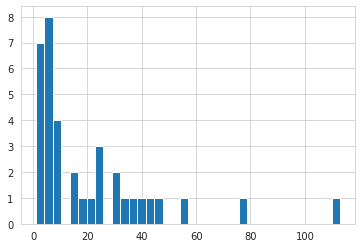

In [86]:
data.ID.value_counts().hist(bins=data.ID.nunique())

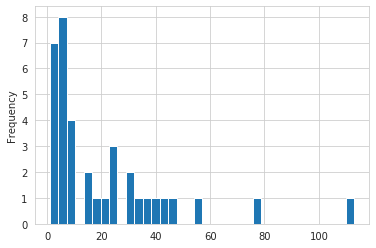

In [87]:
data.ID.value_counts().plot.hist(bins=data.ID.nunique())

In [88]:
data.drop('ID', axis=1, inplace=True)

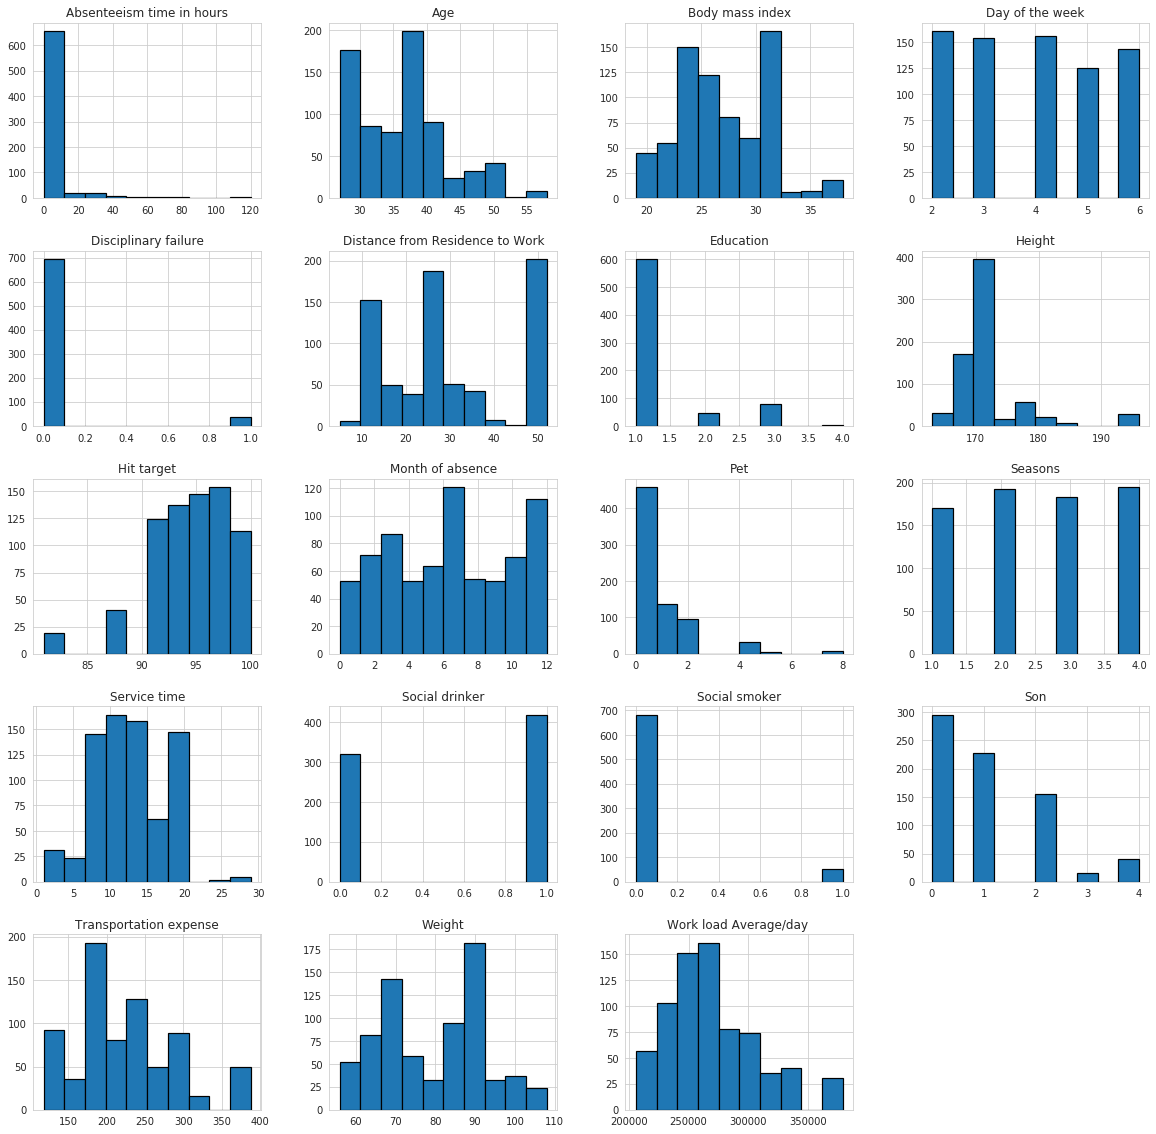

In [89]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [90]:
print(f"{data['Absenteeism time in hours'].value_counts()}")
print(f"{data['Absenteeism time in hours'].value_counts()[0] / data['Absenteeism time in hours'].value_counts()[1]}")

8.0      199
2.0      155
3.0      110
1.0       88
4.0       60
0.0       36
16.0      19
24.0      16
40.0       7
5.0        7
32.0       5
64.0       3
80.0       3
120.0      3
56.0       2
112.0      2
104.0      1
7.0        1
48.0       1
Name: Absenteeism time in hours, dtype: int64
0.4090909090909091


In [91]:
data["Reason for absence"].value_counts()

Group_4    432
Group_1    232
Group_3     67
Group_2      6
Name: Reason for absence, dtype: int64

In [92]:
reason_dic = {0: "Group_1", 1: "Group_1", 2: "Group_1", 3: "Group_1", 
                                                             4: "Group_1", 5: "Group_1", 6: "Group_1", 7: "Group_1", 
                                                             8: "Group_1", 9: "Group_1", 10: "Group_1", 11: "Group_1", 
                                                             12: "Group_1", 13: "Group_1", 14: "Group_1", 15: "Group_2", 
                                                             16: "Group_2", 17: "Group_2", 17: "Group_2", 18: "Group_3", 
                                                             19: "Group_3", 20: "Group_3", 21: "Group_3", 22: "Group_4", 
                                                             23: "Group_4", 24: "Group_4", 25: "Group_4", 26: "Group_4", 
                                                             27: "Group_4", 28: "Group_4"}


print(reason_dic)

{0: 'Group_1', 1: 'Group_1', 2: 'Group_1', 3: 'Group_1', 4: 'Group_1', 5: 'Group_1', 6: 'Group_1', 7: 'Group_1', 8: 'Group_1', 9: 'Group_1', 10: 'Group_1', 11: 'Group_1', 12: 'Group_1', 13: 'Group_1', 14: 'Group_1', 15: 'Group_2', 16: 'Group_2', 17: 'Group_2', 18: 'Group_3', 19: 'Group_3', 20: 'Group_3', 21: 'Group_3', 22: 'Group_4', 23: 'Group_4', 24: 'Group_4', 25: 'Group_4', 26: 'Group_4', 27: 'Group_4', 28: 'Group_4'}


In [93]:
data["Reason for absence"].map(reason_dic)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
735    NaN
736    NaN
737    NaN
738    NaN
739    NaN
Name: Reason for absence, Length: 740, dtype: object

In [94]:
data["Reason for absence"] = data["Reason for absence"].map(reason_dic)
# data["Reason for Absence"] = data["Reason for Absence"].astype("category").cat.codes
data["Reason for absence"].value_counts()

Series([], Name: Reason for absence, dtype: int64)

In [95]:
data_1 = pd.get_dummies(data, columns=['Reason for absence'])

In [96]:
data_1.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [97]:
data_1.dtypes

Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [98]:
data_1.dropna(inplace=True)
data_1.isna().sum()

Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [99]:
data_1.Education.value_counts()

1.0    525
3.0     71
2.0     42
4.0      4
Name: Education, dtype: int64

In [100]:
data_1["Education"] = data_1.Education.map({1: 0, 2: 1, 3: 1, 4: 1})


In [101]:
data_1.Education.value_counts()

0    525
1    117
Name: Education, dtype: int64

In [102]:
data_2 = pd.get_dummies(data_1, columns=["Education"], drop_first=True)
data_2.columns

Index(['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours',
       'Education_1'],
      dtype='object')

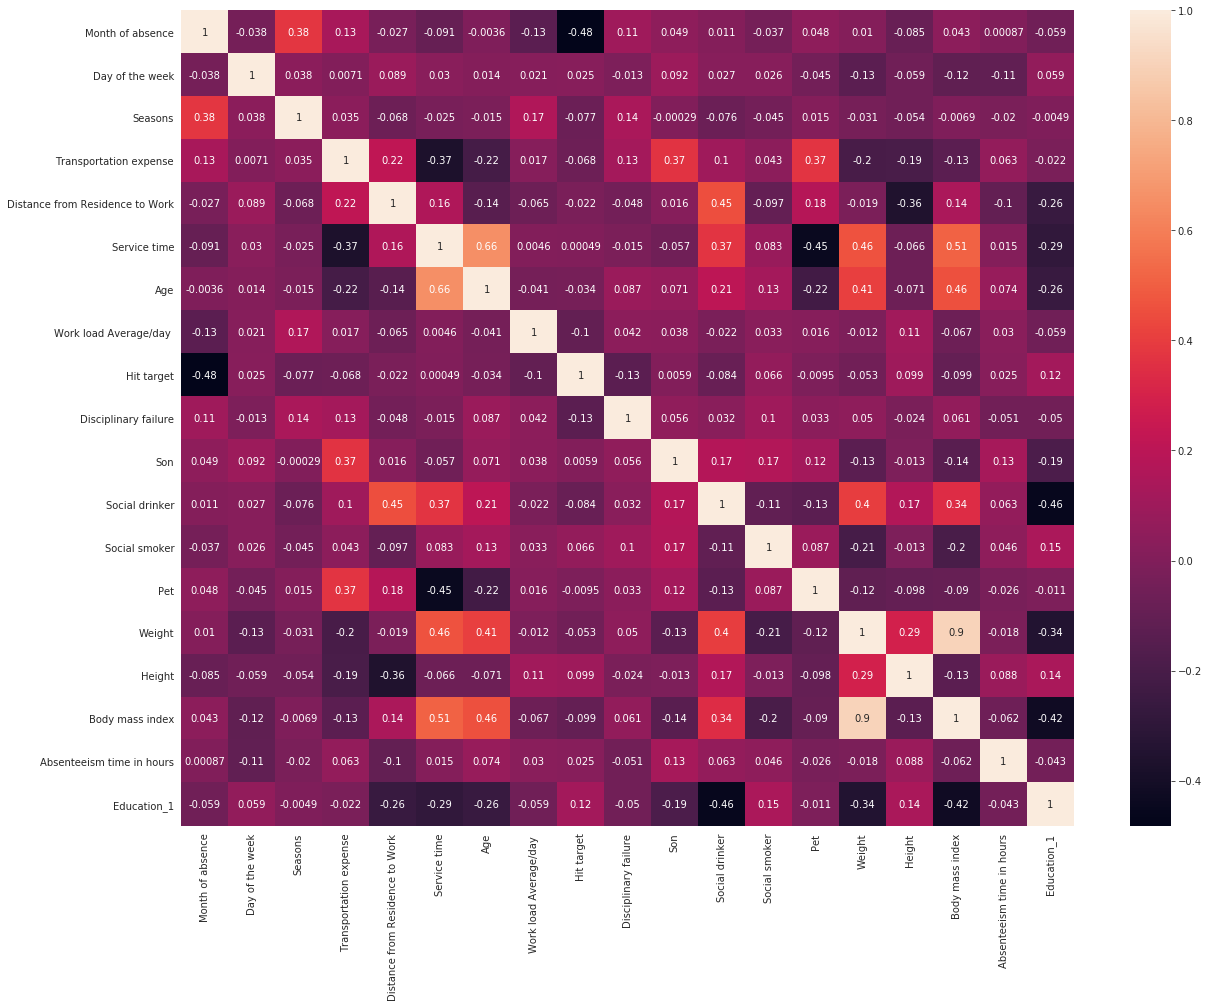

In [103]:
plt.figure(figsize=(20, 15))
sns.heatmap(data_2.corr(), annot=True)

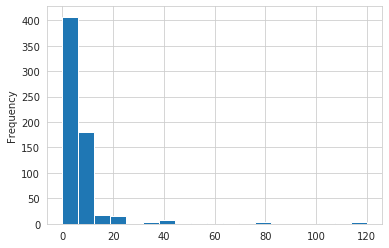

In [104]:
# data_2['Absenteeism time in hours'].hist(bins=data_2['Absenteeism time in hours'].nunique())

#or

data_2['Absenteeism time in hours'].plot.hist(bins=data_2['Absenteeism time in hours'].nunique())

In [105]:
data_1.isna().sum()

Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [106]:
# data_2.drop(["Distance to Work", "Month of absence", "Weekday", "Age", "Daily Work Load Average"], axis=1, inplace=True)

In [107]:
data_2.head(2)

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Education_1
0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0,0
1,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0,0


In [108]:
X = data_2.drop('Absenteeism time in hours', axis=1)
y = np.where(data_2["Absenteeism time in hours"] > data_2["Absenteeism time in hours"].median(), 1, 0)

print(X.shape)
print(y.shape)

(642, 18)
(642,)


In [109]:
y.sum() / y.shape[0]

0.45638629283489096

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

model = LogisticRegression(solver="liblinear")

x_sc = StandardScaler()
X_std = x_sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=20)


# print(y_train)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [136]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

def accuracy_report(y_test, y_test_pred, sample="Test"):
    print(f"========={sample} data============ :\n=>Accuracy Score {accuracy_score(y_test, y_test_pred)}")
    print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")

In [112]:
accuracy_report(y_train, y_train_pred, "Train")

=========Train data============ :
=>Accuracy Score 0.6939571150097466
=>Confusion Matrix :
[[212  67]
 [ 90 144]]


In [113]:
accuracy_report(y_test, y_test_pred, "Test")

=========Test data============ :
=>Accuracy Score 0.6744186046511628
=>Confusion Matrix :
[[50 20]
 [22 37]]


In [114]:
model.score(X_train, y_train)

0.6939571150097466

In [115]:
scores = cross_val_score(model, X_std, y, cv=10)
scores.mean()

0.6057932692307693

In [116]:
model.intercept_

array([-0.23838943])

In [117]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
feature_name = X.columns
summary_table = pd.DataFrame(columns=["Features_name"], data=feature_name)
summary_table["Coefficients"] = np.transpose(model.coef_)
summary_table

,Features_name,Coefficients
0,Month of absence,0.141804
1,Day of the week,-0.356088
2,Seasons,-0.165387
3,Transportation expense,0.534952
4,Distance from Residence to Work,-0.220720
5,Service time,-0.146594
6,Age,-0.041738
7,Work load Average/day,0.247615
8,Hit target,-0.035329
9,Disciplinary failure,-0.835726


In [119]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
summary_table.sort_index(inplace=True)

In [120]:
summary_table["Odds_ratio"] = np.exp(summary_table.Coefficients)
summary_table.sort_values(by="Odds_ratio", ascending=False)

,Features_name,Coefficients,Odds_ratio
4,Transportation expense,0.534952,1.707367
15,Weight,0.515564,1.674584
11,Son,0.414033,1.512907
12,Social drinker,0.263763,1.301820
8,Work load Average/day,0.247615,1.280967
1,Month of absence,0.141804,1.152351
18,Education_1,0.127860,1.136394
13,Social smoker,0.018956,1.019137
9,Hit target,-0.035329,0.965288
7,Age,-0.041738,0.959121


In [121]:
# Random Forest¶
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

param_grid = {'max_depth':[3, None], 'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 10], 'bootstrap':[True, False], 
              'criterion':["gini", "entropy"]}

random_forest_grid = GridSearchCV(rf_model, param_grid, scoring="accuracy", 
                                  n_jobs=-1, verbose=1, cv=3, iid=True)

random_forest_grid.fit(X_train, y_train)

y_train_pred = random_forest_grid.predict(X_train)
y_test_pred = random_forest_grid.predict(X_test)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   30.3s finished
/home/rakesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [122]:
accuracy_report(y_test, y_test_pred)

=========Test data============ :
=>Accuracy Score 0.689922480620155
=>Confusion Matrix :
[[55 15]
 [25 34]]


In [123]:
accuracy_report(y_train, y_train_pred, "Train")

=========Train data============ :
=>Accuracy Score 0.8810916179337231
=>Confusion Matrix :
[[257  22]
 [ 39 195]]


In [124]:
# Gradient Boosting Classifier¶


from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

gbm_model.fit(X_train, y_train)

y_train_pred = gbm_model.predict(X_train)
y_test_pred = gbm_model.predict(X_test)

In [125]:
accuracy_report(y_test, y_test_pred)

=========Test data============ :
=>Accuracy Score 0.6976744186046512
=>Confusion Matrix :
[[54 16]
 [23 36]]


In [126]:
accuracy_report(y_train, y_train_pred, "Train")


=========Train data============ :
=>Accuracy Score 0.8732943469785575
=>Confusion Matrix :
[[253  26]
 [ 39 195]]


In [127]:
# XGBoost
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

hyperparameter_grid = {'n_estimators': n_estimators, 'max_depth': max_depth,
                       'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
                       'booster' : booster, 'base_score' : base_score
                      }

xgb_model = xgb.XGBClassifier()

xgb_cv = RandomizedSearchCV(estimator=xgb_model, param_distributions=hyperparameter_grid,
                               cv=5, n_iter=50, scoring = 'accuracy',n_jobs =-1, iid=True,
                               verbose = 5, return_train_score = True, random_state=42)


xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   30.7s finished
/home/rakesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   iid=True, n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 0.99],
                                        'booste

In [128]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=900, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [129]:
xgb_best = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                         colsample_bynode=1, colsample_bytree=1, gamma=0,
                         learning_rate=0.1, max_delta_step=0, max_depth=2,
                         min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
                         nthread=None, objective='binary:logistic', random_state=0,
                         reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                         silent=None, subsample=1, verbosity=1)

In [130]:
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [131]:
y_train_pred = xgb_best.predict(X_train)
y_test_pred = xgb_best.predict(X_test)

In [132]:
accuracy_report(y_test, y_test_pred)

=========Test data============ :
=>Accuracy Score 0.7054263565891473
=>Confusion Matrix :
[[53 17]
 [21 38]]


In [133]:
accuracy_report(y_train, y_train_pred, "Train")

=========Train data============ :
=>Accuracy Score 0.7621832358674464
=>Confusion Matrix :
[[227  52]
 [ 70 164]]


In [155]:
def get_accuracy(y_train_val , y_pred_val , dataset_type = "Default"):
    
    print(" Dataset type is : ", dataset_type)
    
    print("\n Accuracy Score     : ",round(accuracy_score(y_train_val, y_pred_val), 4) * 100)
    
    print("\n precision_accuracy : ",round(precision_score(y_train_val, y_pred_val), 4) * 100)
 
    print("\n recall_accuracy    : ",round(recall_score(y_train_val, y_pred_val), 4) * 100)
    
    print("\n roc_auc_accuracy   : ",round(roc_auc_score(y_train_val, y_pred_val), 4) * 100)
    
    print("\n f1_score_accuracy  : ",round(f1_score(y_train_val, y_pred_val), 4) * 100)
    
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
    
    print("\n Confusion Matrix TN : ", tn, " FP : ", fp, " FN : ", fn, " TP : ", tp)

In [156]:
get_accuracy(y_train, y_train_pred, "Train")

 Dataset type is :  Train

 Accuracy Score     :  76.22

 precision_accuracy :  75.92999999999999

 recall_accuracy    :  70.09

 roc_auc_accuracy   :  75.72

 f1_score_accuracy  :  72.89

 Confusion Matrix TN :  227  FP :  52  FN :  70  TP :  164


In [159]:
from sklearn.metrics import f1_score, precision_recall_fscore_support, classification, classification_report


In [162]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       279
           1       0.76      0.70      0.73       234

    accuracy                           0.76       513
   macro avg       0.76      0.76      0.76       513
weighted avg       0.76      0.76      0.76       513



In [164]:
from sklearn import metrics 

In [166]:
help(metrics)

Help on package sklearn.metrics in sklearn:

NAME
    sklearn.metrics

DESCRIPTION
    The :mod:`sklearn.metrics` module includes score functions, performance metrics
    and pairwise metrics and distance computations.

PACKAGE CONTENTS
    _base
    _classification
    _pairwise_fast
    _plot (package)
    _ranking
    _regression
    _scorer
    base
    classification
    cluster (package)
    pairwise
    pairwise_fast
    ranking
    regression
    scorer
    setup
    tests (package)

CLASSES
    builtins.object
        sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay
        sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay
        sklearn.metrics._plot.roc_curve.RocCurveDisplay
    
    class ConfusionMatrixDisplay(builtins.object)
     |  ConfusionMatrixDisplay(confusion_matrix, display_labels)
     |  
     |  Confusion Matrix visualization.
     |  
     |  It is recommend to use :func:`~sklearn.metrics.plot_confusion_matrix` to
     |  create

In [83]:
# Save the model
import pickle

with open('model', 'wb') as file:
    pickle.dump(xgb_best, file)